In [1]:
import geopandas as gpd
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import os
import rioxarray

from levee_hunter.utils import find_splits
from levee_hunter.get_mask import get_mask
from levee_hunter.segmentation_dataset import SegmentationDataset

In [2]:
# Importing the Lidar data (.tif files)
data_dir = "../data/raw/w3-Lidar"
tif_files = [file for file in os.listdir(data_dir) if file.endswith(".tif")]
images = [
    rioxarray.open_rasterio(os.path.join(data_dir, file)) for file in tif_files[:]
]

print(len(tif_files))
tif_files[0:5]

3


['USGS_1_n39w122_20240313.tif',
 'USGS_13_n39w122_20240313.tif',
 'USGS_one_meter_x63y422_CA_Sacramento_2017.tif']

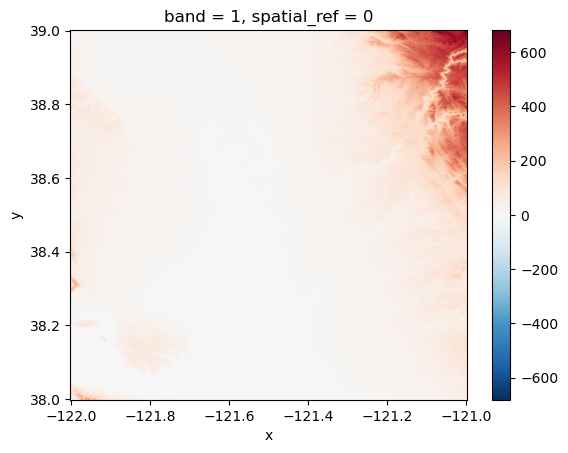

In [3]:
img_1 = images[0]
img_1.plot()

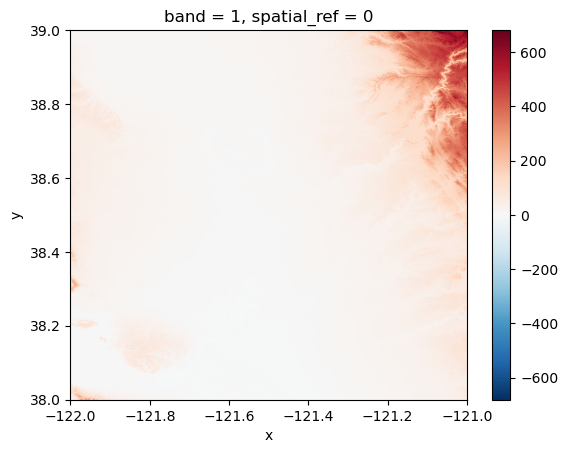

In [4]:
img_13 = images[1]
img_13.plot()

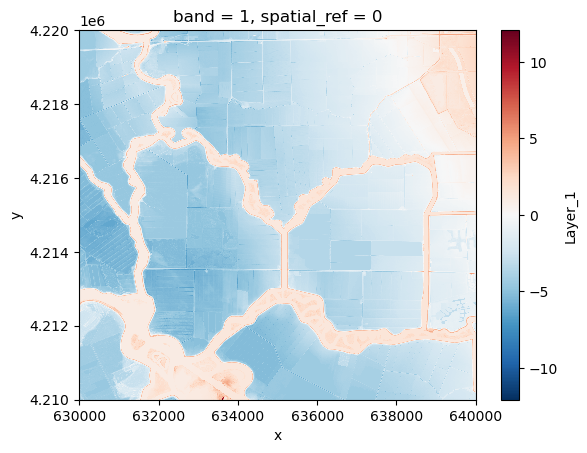

In [5]:
img_1m = images[2]
img_1m.plot()

In [6]:
print(img_1.rio.crs, img_13.rio.crs, img_1m.rio.crs)

EPSG:4269 EPSG:4269 EPSG:26910


In [7]:
img_1.shape, img_13.shape, img_1m.shape

((1, 3612, 3612), (1, 10812, 10812), (1, 10012, 10012))

In [8]:
# Load the levees data
levees_file = "../data/raw/w1-Kickoff/us_levees_n38w122.gpkg"
levees_data = gpd.read_file(levees_file)
levees_data_4269 = levees_data.to_crs("EPSG:4269")
levees_data_26910 = levees_data.to_crs("EPSG:26910")

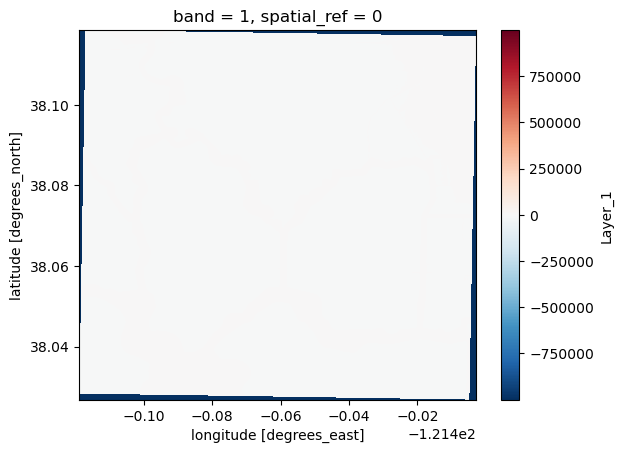

In [9]:
# This is the reprojection issue that I have been having
# That is why I preferred to reproject levees to the
# same crs as the images, not the other way around
img_1m_4269 = img_1m.rio.reproject("EPSG:4269")
img_1m_4269.plot()

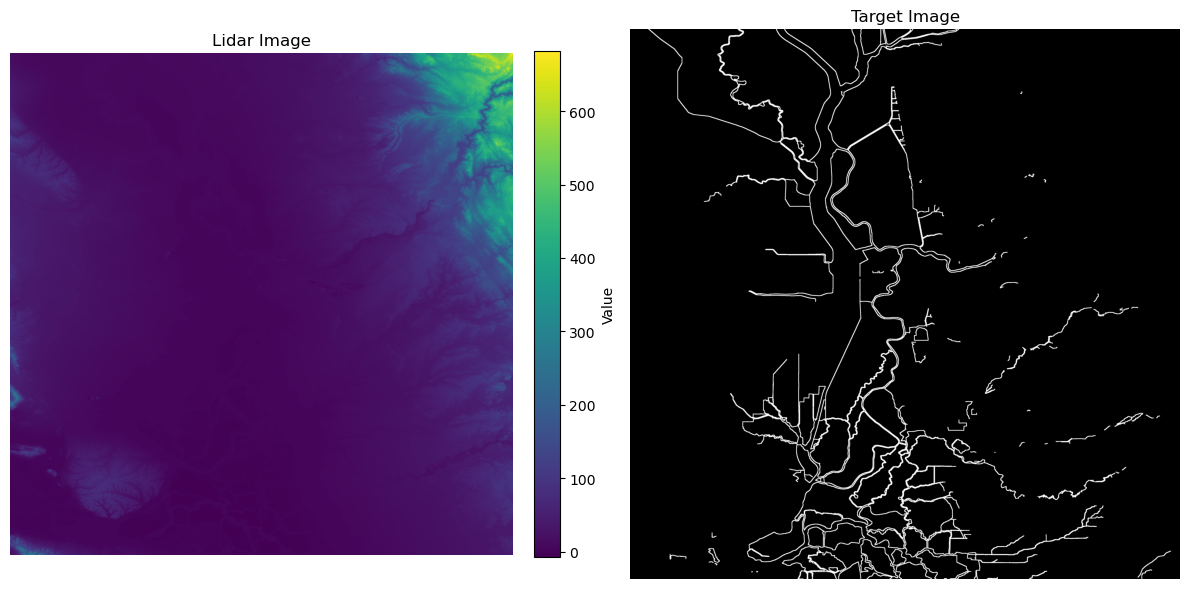

In [10]:
img_1_arr, img_1_target = get_mask(
    img_1, levees_data_4269, invert=True, dilation_size=5
)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot the first image
im = axes[0].imshow(img_1_arr.squeeze(), cmap="viridis")
axes[0].set_title("Lidar Image")
axes[0].axis("off")

cbar = fig.colorbar(im, ax=axes[0], orientation="vertical", fraction=0.046, pad=0.04)
cbar.set_label("Value")

# Plot the second image
axes[1].imshow(
    img_1_target.squeeze(), cmap=ListedColormap(["white", "black"]), vmin=0, vmax=1
)  # Explicitly map 0->white, 1->black
axes[1].set_title("Target Image")
axes[1].axis("off")


plt.tight_layout()
plt.show()

In [11]:
img_1_target = img_1_target.reshape(1, 3612, 3612)
img_1_arr.shape, img_1_target.shape

((1, 3612, 3612), (1, 3612, 3612))

In [12]:
find_splits(Z=3612, s=512, max_overlap_frac=0.1)[:10]

[(7, 0, 3584),
 (7, 1, 3578),
 (7, 2, 3572),
 (7, 3, 3566),
 (7, 4, 3560),
 (7, 5, 3554),
 (7, 6, 3548),
 (7, 7, 3542),
 (7, 8, 3536),
 (7, 9, 3530)]

In [14]:
img_1_dataset_512 = SegmentationDataset(
    img_1_arr[:, :3548, :3548],
    img_1_target[:, :3548, :3548],
    transform=None,
    split=True,
    patch_size=512,
    final_size=512,
    overlap=6,
)

len(img_1_dataset_512)

49

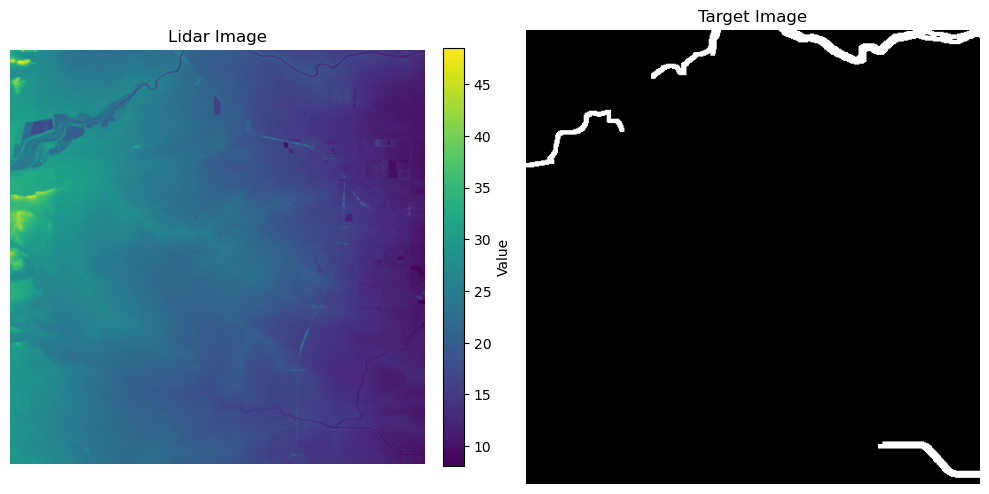

In [41]:
img_1_dataset_512.plot(15, figsize=(10, 10))

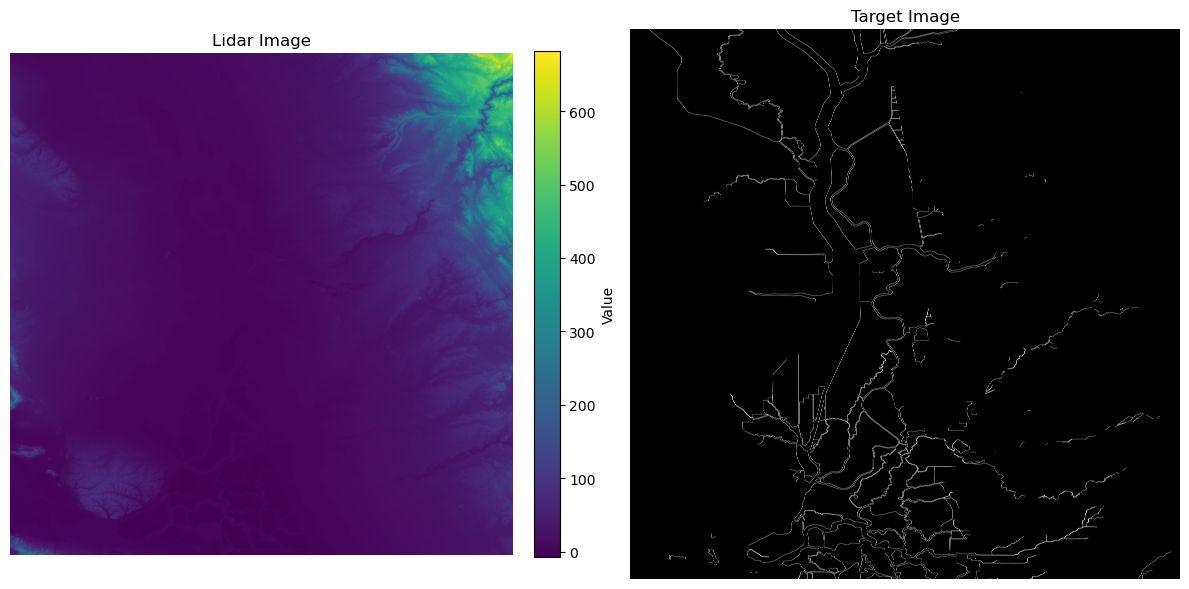

In [42]:
img_13_arr, img_13_target = get_mask(
    img_13, levees_data_4269, invert=True, dilation_size=5
)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot the first image
im = axes[0].imshow(img_13_arr.squeeze(), cmap="viridis")
axes[0].set_title("Lidar Image")
axes[0].axis("off")

cbar = fig.colorbar(im, ax=axes[0], orientation="vertical", fraction=0.046, pad=0.04)
cbar.set_label("Value")

# Plot the second image
axes[1].imshow(
    img_13_target.squeeze(), cmap=ListedColormap(["white", "black"]), vmin=0, vmax=1
)  # Explicitly map 0->white, 1->black
axes[1].set_title("Target Image")
axes[1].axis("off")


plt.tight_layout()
plt.show()

In [43]:
img_13_target = img_13_target.reshape(1, 10812, 10812)
img_13_arr.shape, img_13_target.shape

((1, 10812, 10812), (1, 10812, 10812))

In [44]:
find_splits(Z=10812, s=512, max_overlap_frac=0.1)[:10]

[(23, 44, 10808),
 (22, 22, 10802),
 (23, 45, 10786),
 (22, 23, 10781),
 (23, 46, 10764),
 (22, 24, 10760),
 (21, 0, 10752),
 (23, 47, 10742),
 (22, 25, 10739),
 (21, 1, 10732)]

In [45]:
img_13_dataset_512 = SegmentationDataset(
    img_13_arr[:, :10802, :10802],
    img_13_target[:, :10802, :10802],
    transform=None,
    split=True,
    patch_size=512,
    final_size=512,
    overlap=22,
)

len(img_13_dataset_512)

484

In [46]:
img_13_dataset_512.remove_empty(keep_empty=0.1)

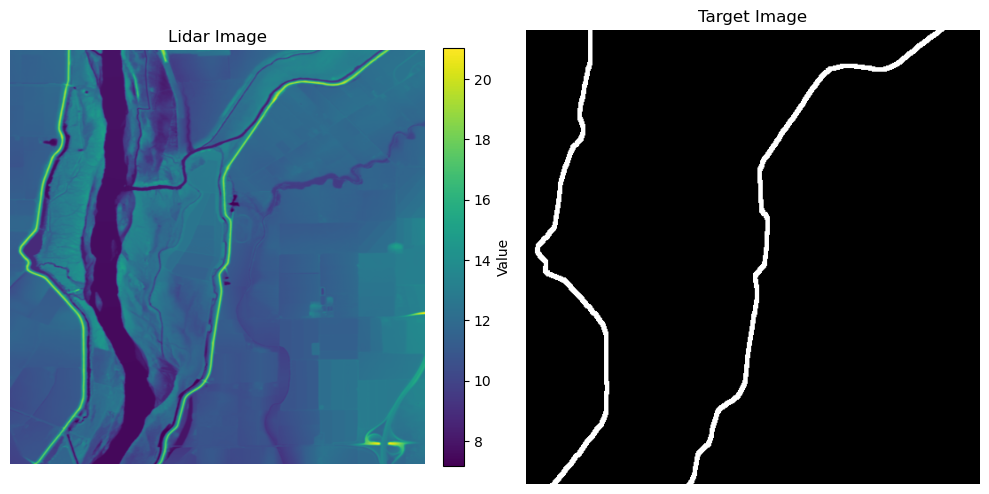

In [47]:
img_13_dataset_512.plot(19, figsize=(10, 10))

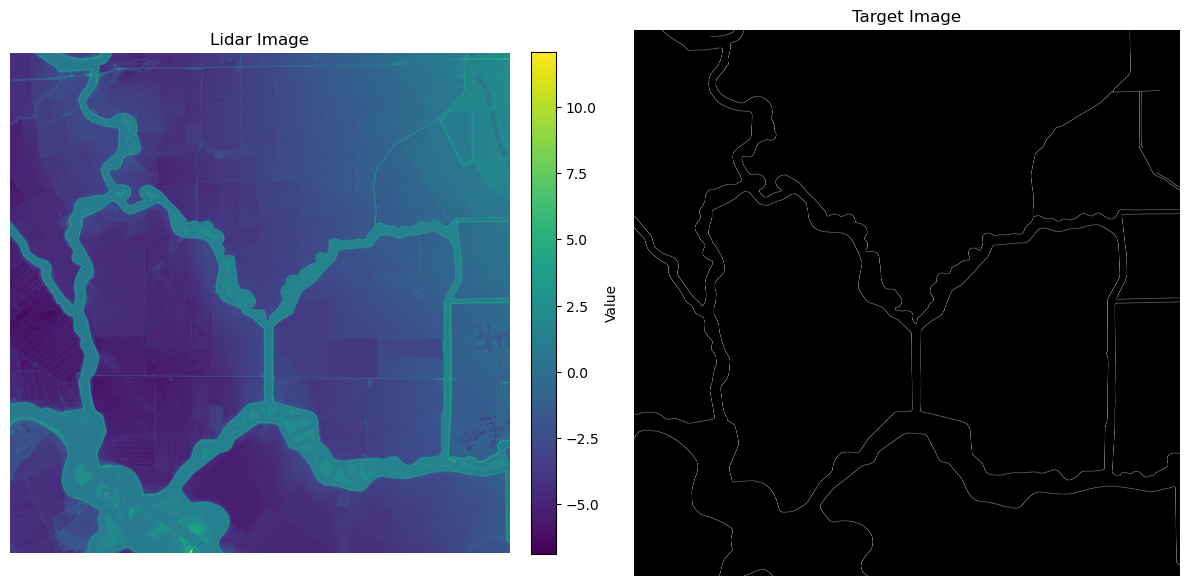

In [48]:
img_1m_arr, img_1m_target = get_mask(
    img_1m, levees_data_26910, invert=True, dilation_size=5
)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot the first image
im = axes[0].imshow(img_1m_arr.squeeze(), cmap="viridis")
axes[0].set_title("Lidar Image")
axes[0].axis("off")

cbar = fig.colorbar(im, ax=axes[0], orientation="vertical", fraction=0.046, pad=0.04)
cbar.set_label("Value")

# Plot the second image
axes[1].imshow(
    img_1m_target.squeeze(), cmap=ListedColormap(["white", "black"]), vmin=0, vmax=1
)  # Explicitly map 0->white, 1->black
axes[1].set_title("Target Image")
axes[1].axis("off")


plt.tight_layout()
plt.show()

In [51]:
img_1m_target = img_1m_target.reshape(1, 10012, 10012)
img_1m_arr.shape, img_1m_target.shape

((1, 10012, 10012), (1, 10012, 10012))

In [52]:
find_splits(Z=10012, s=512, max_overlap_frac=0.1)[:10]

[(20, 12, 10012),
 (21, 37, 10012),
 (20, 13, 9993),
 (21, 38, 9992),
 (20, 14, 9974),
 (21, 39, 9972),
 (20, 15, 9955),
 (21, 40, 9952),
 (20, 16, 9936),
 (21, 41, 9932)]

In [53]:
img_1m_dataset_512 = SegmentationDataset(
    img_1m_arr[:, :10012, :10012],
    img_1m_target[:, :10012, :10012],
    transform=None,
    split=True,
    patch_size=512,
    final_size=512,
    overlap=12,
)

len(img_1m_dataset_512)

400

In [55]:
img_1m_dataset_512.remove_empty(keep_empty=0.1)

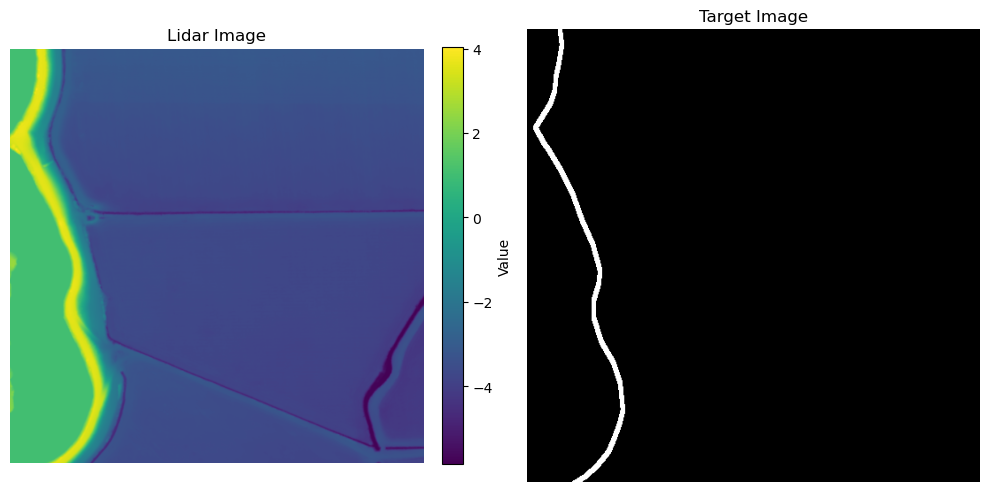

In [56]:
img_1m_dataset_512.plot(19, figsize=(10, 10))